In [31]:
#basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
import glob

def basic_avg(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    
    #Separate into train and test
    print('separating into train and test')
    train = df[:33600]
    test = df[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
               
    # groupby (in our case this is the prediction)
    print('Predicting')
    prediction_hh = []
    mean = train["energy(kWh/hh)"].mean()
    prediction_hh.append(mean)
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred = prediction_hh*1488   
    
    return y_pred


# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/uni' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
pred_basic = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    y_pred = basic_avg(df)
    pred_basic.append(y_pred)
    pred_basic.append(y_pred)
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))

separating into train and test
Predicting
filename number 1 of 1


In [32]:
#weekly

import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn import metrics
import glob
import math
import matplotlib.pyplot as plt
from statistics import mean 
from sklearn.metrics import mean_squared_error
from math import sqrt

def average_week(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    df['year'] = pd.DatetimeIndex(df['tstp']).year
    
    #Separate into train and test
    print('Separating into train and test')
    train = df[:33648]
    test = df[33648:34992]
    y_test = test['energy(kWh/hh)'].to_list()
        
    #create columns for the grouping by tstp
    train['day_of_week'] = pd.DatetimeIndex(train['tstp']).dayofweek
    train['hour'] = pd.DatetimeIndex(train['tstp']).hour
    train['minute'] = pd.DatetimeIndex(train['tstp']).minute
        
    #Predict
    print('Predicting')
    # groupby (in our case this is the prediction)
    prediction_hh = train.groupby(['day_of_week','hour','minute']).mean().reset_index()
    del prediction_hh['year']
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred_sem1 = prediction_hh['energy(kWh/hh)']
    y_pred_sem2 = prediction_hh['energy(kWh/hh)']
    y_pred_sem3 = prediction_hh['energy(kWh/hh)']
    y_pred_sem4 = prediction_hh['energy(kWh/hh)']
    frames = [y_pred_sem1,y_pred_sem2,y_pred_sem3,y_pred_sem4]
    y_pred = pd.concat(frames).to_list()
    
    return y_pred

# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/uni' # use your path
all_files = glob.glob(path + "/*.csv")

pred_weekly = []
i = 0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    y_pred = average_week(df)
    pred_weekly.append(y_pred)
    pred_weekly.append(y_pred)
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))


Separating into train and test


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Predicting
filename number 1 of 1


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
#ARIMA

import pandas as pd
import numpy as np
import glob
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

def arima_loop(dataset):

    # split into train and test sets
    print('Separating into train and test')
    train = dataset.iloc[:33600]
    test = dataset.iloc[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
    
    # Create Model
    print('Creating model')
    arima_model = ARIMA(train,order = (2,0,0)).fit()

    #Predict and save results
    print('Prediciting and saving results')
    ARIMA_prediction = arima_model.predict(start=33600, end =35087,typ= 'levels')
    y_pred = ARIMA_prediction.to_list()

    return y_pred


# load the dataset
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/uni' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
pred_arima = []
for filename in all_files:
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True) 
    y_pred = arima_loop(df)
    pred_arima.append(y_pred)
    pred_arima.append(y_pred)
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))

    

Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
filename number 1 of 1


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


filename number 1 of 1/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/uni/MAC000022.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 6s 173us/step - loss: 0.0548 - rmsle_loss: 0.0548 - val_loss: 0.0490 - val_rmsle_loss: 0.0506
Epoch 2/15
32252/32252 [==============================] - 4s 128us/step - loss: 0.0460 - rmsle_loss: 0.0460 - val_loss: 0.0491 - val_rmsle_loss: 0.0508
Epoch 00002: early stopping


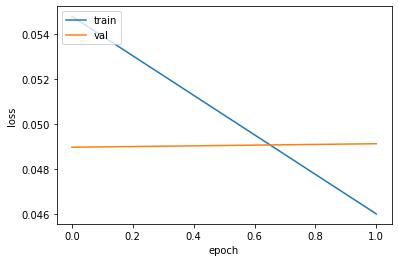

Making predictions


In [34]:
#LSTM Uni

import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import random
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras import backend as K
from math import sqrt


def rmsle_loss(y_pred, y_true):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


def lstm_univariate_loop(dataset):
    
    random.seed(1)
    dataset = df.values
    dataset = df.astype('float32')
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    print('Spliting into train and test')
    train_size = int(33600)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    testY_copy = testY.copy()
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    print('Creating and fitting the LSTM network')
    
    model = Sequential()
    model.add(LSTM(200, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss=rmsle_loss, optimizer='adam', metrics = [rmsle_loss])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(trainX, trainY, epochs=15, batch_size=70,validation_split=0.04, verbose=1, shuffle=False, callbacks = [es])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # make predictions
    print('Making predictions')
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    return testPredict

# load the dataset
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/uni' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
pred_lstm_u = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)) + str(filename))
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True)
    testPredict = lstm_univariate_loop(df)
    pred_lstm_u.append(testPredict)
    pred_lstm_u.append(testPredict)
    

filename number 1 of 1
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.207955   0.803549   0.637883   0.466877   0.701607   0.478840   
2   0.203768   0.803549   0.637883   0.466877   0.701607   0.478840   
3   0.212840   0.797212   0.662953   0.479232   0.703282   0.475585   
4   0.202373   0.797212   0.662953   0.479232   0.703282   0.475585   
5   0.153524   0.711660   0.637883   0.475552   0.703952   0.476621   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)  
1   0.403581   0.909091        1.0  0.203768  
2   0.403581   0.909091        1.0  0.212840  
3   0.414601   0.870130        1.0  0.202373  
4   0.414601   0.870130        1.0  0.153524  
5   0.362948   0.883117        1.0  0.078856  
Splitting into train and test
(33600, 1, 9) (33600,) (1455, 1, 9) (1455,)
Designing network
Fitting network
Train on 32256 samples, validate on 1344 samples
Epoch 1/15
32256/32256 [==============================] - 3s 92us/step - loss: 0.0671 - rmsle_loss: 0.0671 - va

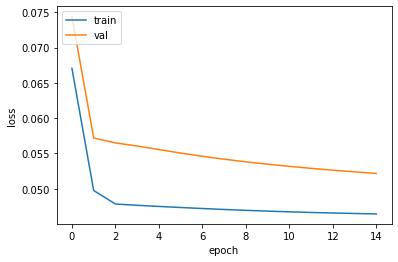

In [35]:
#LSTM Multi

import pandas as pd
from pandas import read_csv
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import glob
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras import backend as K


def rmsle_loss(y_pred, y_true):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def lstm_multivariate(filename):
    random.seed(1)
    values = filename.values
    
    # integer encode direction
    encoder = LabelEncoder()
    values[:,8] = encoder.fit_transform(values[:,8])
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[10,11,11,12,13,14,15,16,17]], axis=1, inplace=True)
    print(reframed.head())
    
    
    # split into train and test sets
    print("Splitting into train and test")
    values = reframed.values
    n_train_hours = 33600
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    
    # design network
    print("Designing network")
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss=rmsle_loss, optimizer='adam', metrics = [rmsle_loss])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
   
    # fit network
    print("Fitting network")
    history = model.fit(train_X, train_y, epochs=15, batch_size=70,validation_split=0.04, verbose=1, shuffle=False, callbacks = [es])
    
    
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    
    
    return inv_y

# load the dataset
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/graph/multi' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
pred_lstm_m = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))
    df = pd.read_csv(filename,parse_dates = ['tstp'], index_col = ['tstp'])
    inv_y = lstm_multivariate(df)
    pred_lstm_m.append(inv_y)
    pred_lstm_m.append(inv_y)


In [48]:
#Original 

original = df[['energy(kWh/hh)']]

In [53]:
# merge
concat = pd.concat(pred_basic,pred_weekly,pred_arima,pred_lstm_u,pred_lstm_m)


ValueError: Only can inner (intersect) or outer (union) join the other axis

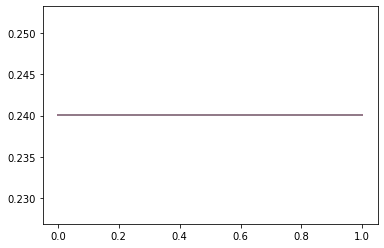

In [51]:
# Graph

plt.plot(pred_basic)
plt.show()

list